In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

In [2]:
aerolinea=pd.read_csv("aerolinea.csv")

In [3]:
aerolinea.shape

(129880, 24)

In [4]:
aerolinea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [5]:
aerolinea.head(5)

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


PREGUNTA 1-¿QUE PORCENTAJE DE PASAJEROS DE AEROLINEAS ESTAN SATISFECHOS, ¿VARIA SEGUN EL TIPO DE CLIENTE? ¿QUE PASA CON EL TIPO DE VIAJE?

In [6]:
grouped = aerolinea.groupby(["Satisfaction","Customer Type","Type of Travel"])["ID"].count().to_frame()
total_por_categoria2 = grouped.sum()
porcentajes = (grouped/ total_por_categoria2)*100

print(porcentajes)

                                                             ID
Satisfaction            Customer Type Type of Travel           
Neutral or Dissatisfied First-time    Business        13.790422
                                      Personal         0.130120
                        Returning     Business        14.956883
                                      Personal        27.676317
Satisfied               First-time    Business         4.364028
                                      Personal         0.024638
                        Returning     Business        35.947028
                                      Personal         3.110564


(array([0, 1]),
 [Text(0, 0, 'Neutral or Dissatisfied'), Text(1, 0, 'Satisfied')])

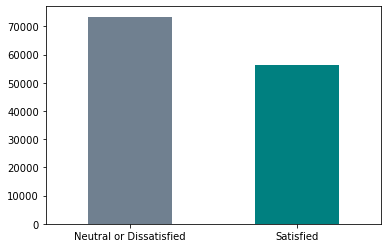

In [7]:
aerolinea['Satisfaction'].value_counts(normalize = True)*100
aerolinea['Satisfaction'].value_counts().plot.bar(color = ['slategray','teal'])
plt.xticks(rotation=360)

C:\Users\guz_g\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\guz_g\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


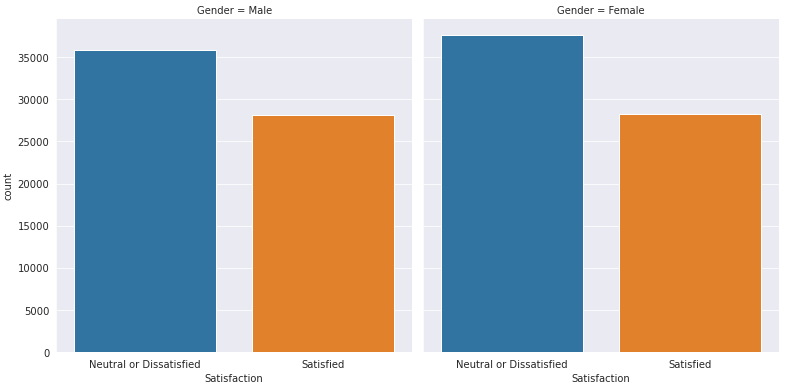

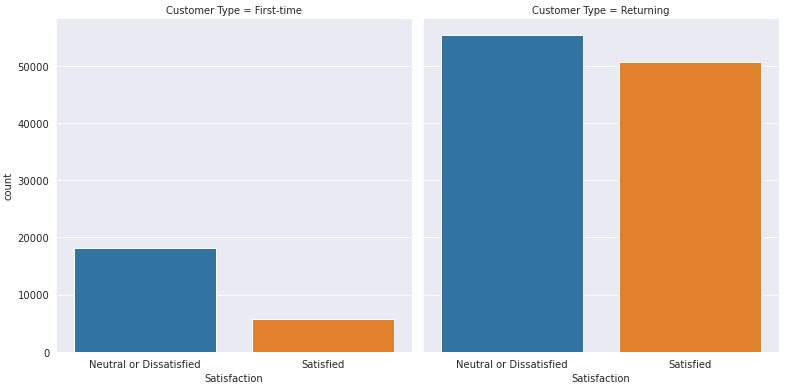

In [8]:
with sns.axes_style(style='darkgrid'):
    g = sns.catplot("Satisfaction", col="Gender", col_wrap=2, data=aerolinea, kind="count", height=5.5, aspect=1.0)  
    g = sns.catplot("Satisfaction", col="Customer Type", col_wrap=2, data=aerolinea, kind="count", height=5.5, aspect=1.0)

Como podeos ver el 56.55% de los Pasajeros son Neutros y el 43.44% estan Satisfechos

PREGUNTA 2-¿CUAL ES EL PERFIL DE CLIENTE DE UN PASAJERO RECURRENTE DE UNA AEROLINEA?

Podemos agrupar por variables categorias y numericas

In [9]:
grouped2= aerolinea.groupby(["Customer Type", "Gender"])["ID"].count().to_frame()

In [10]:
grouped2

ID
Customer Type Gender       
First-time    Female  12843
              Male    10937
Returning     Female  53056
              Male    53044

Text(0, 0.5, 'Ratio')

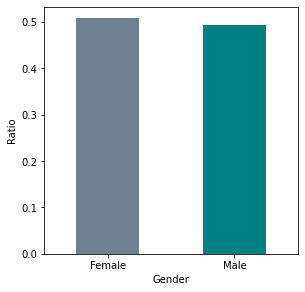

In [11]:
plt.figure(1,figsize=(10,10))
plt.subplot(221)
aerolinea['Gender'].value_counts(normalize = True,dropna=True).plot.bar(color = ['slategray','teal'])
plt.xticks(rotation=360)
plt.xlabel('Gender')
plt.ylabel('Ratio')

Text(0, 0.5, 'Ratio')

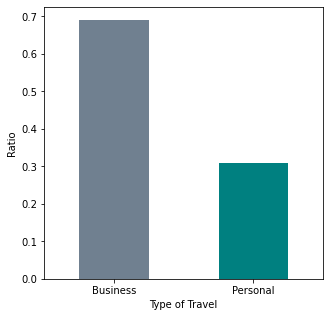

In [12]:
plt.figure(1,figsize=(5,5))
aerolinea['Type of Travel'].value_counts(normalize = True,dropna=True).plot.bar(color = ['slategray','teal'])
plt.xticks(rotation=360)
plt.xlabel('Type of Travel')
plt.ylabel('Ratio')

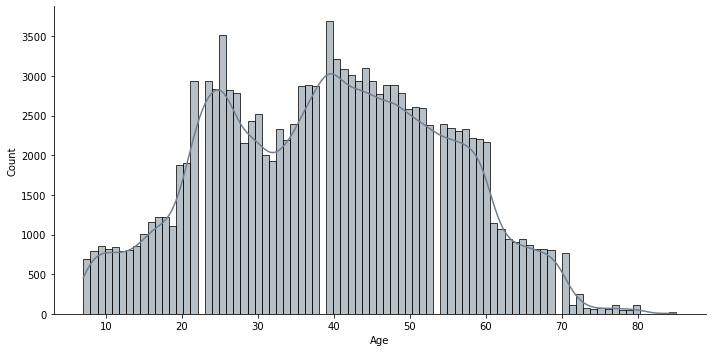

In [13]:
sns.displot(aerolinea['Age'],kde=True,aspect=2,color='slategray')

PREGUNTA 3 ¿LA DISTANCIA DE VUELO AFECTA LAS PREFERENCIAS DE LOS CLIENTES O LOS PATRONES DE VUELO?

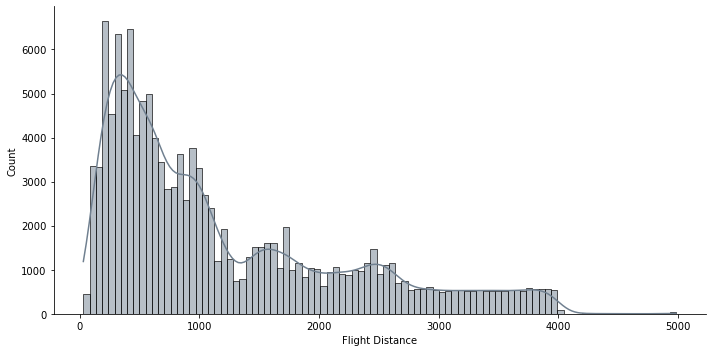

In [14]:
sns.displot(aerolinea['Flight Distance'],kde=True,aspect=2, color='slategray')

Como podemos observar en la grafica de distribucion los clientes prefieren vuelos cin distancias cortas

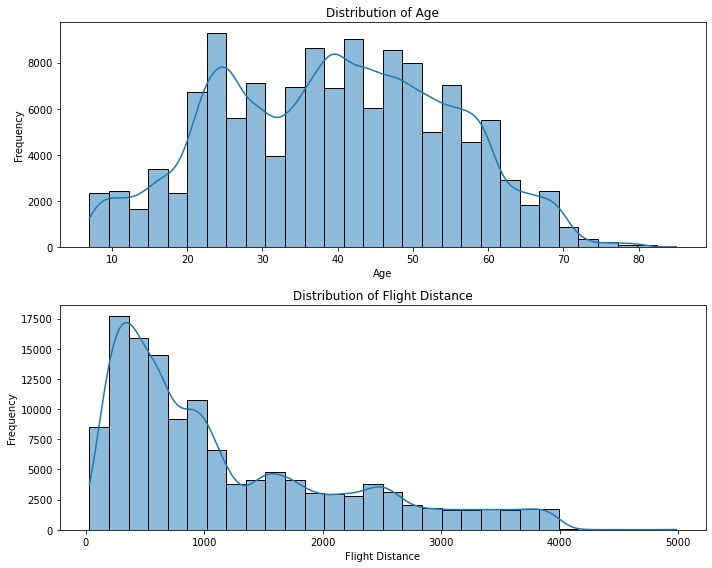

In [15]:
features_to_plot = ['Age', 'Flight Distance']

fig, axes = plt.subplots(nrows=len(features_to_plot), figsize=(10, 8))
for i, col in enumerate(features_to_plot):
    sns.histplot(aerolinea[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

SATISFACTION VS EDAD



Para esta comparacion es necesario convertir el tipo de dato de la columa satisfaccion a tipo int para hacer la grafica 

In [16]:
#podemos utilizar esta funcion de igual manera train["satisfaction"] = train["satisfaction"].map({"satisfied":1,"neutral or dissatisfied":0})
#Esta transformación consiste en mapear los valores en la columna "satisfaction" de "satisfied" (satisfecho) a 1 y "neutral or dissatisfied" (neutral o insatisfecho) a 0

In [17]:
aerolinea['Satisfaction'].replace({'Neutral or Dissatisfied': 0, 'Satisfied': 1},inplace = True)
#convirtiendo una variable categórica en una variable numérica para que el modelo pueda entenderla.

In [18]:

aerolinea.head(5)

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,0
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,1
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,1
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,1
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,1


C:\Users\guz_g\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


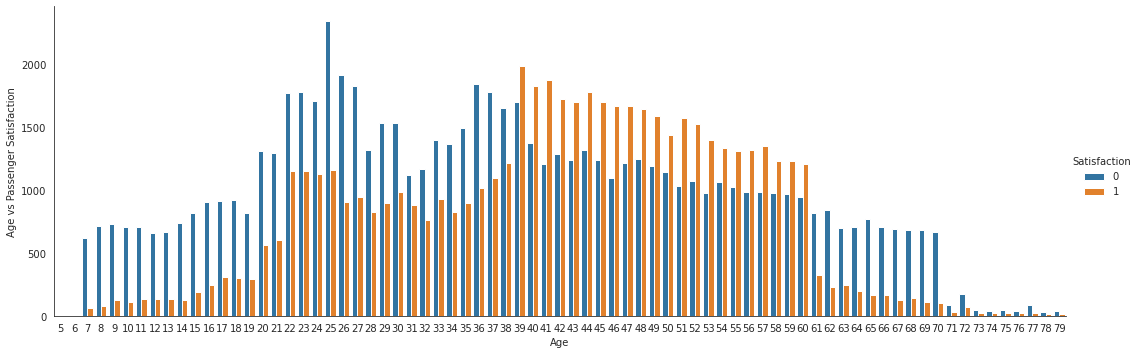

In [19]:
#gráficos categóricos, especialmente diseñados para visualizar relaciones entre variables 
with sns.axes_style('white'):
    g = sns.catplot("Age", data=aerolinea, aspect=3.0, kind='count', hue='Satisfaction', order=range(5, 80))
    g.set_ylabels('Age vs Passenger Satisfaction')
    
#"Age": Esto especifica la variable que se trazará en el eje x, que es la edad del pasajero.
#hue='satisfaction': Esto agrega diferenciación de color a las barras en el gráfico según la variable "satisfacción"

la interpretacion de la grafica es la  siguiente: las personas entre 39 y 60 años son las mas satisfechas. Las menso satistechas son entre 22 y38

SATISFACCION VS DISTANCIA DE VUELO

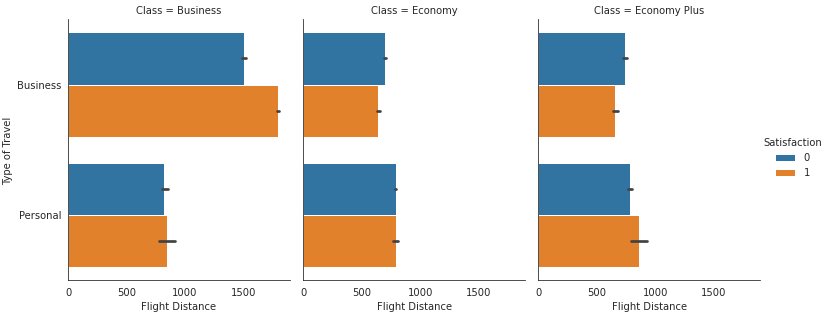

In [24]:
#Me va crear columnas en base al tipo de clase de vuel
with sns.axes_style('white'):
     g = sns.catplot(x="Flight Distance", y="Type of Travel", hue="Satisfaction", col="Class", data=aerolinea, kind="bar", height=4.5, aspect=.8)
#col="Type_of_Travel": Este parámetro crea subtramas para diferentes tipos de viajes (por ejemplo, de negocios o personales) dentro de la misma figura.

Como nos podemos dar cuenta la gente que viaja distancias largas en la clase business esta mas satisfecha que la clase economica 

In [30]:
aerolinea.to_csv("aerolinea.csv", index=False)